In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 39)

In [2]:
url = 'https://raw.githubusercontent.com/ryanrodr/ml-heart-disease/main/dados/heart_disease_preprocessed.csv'

df = pd.read_csv(url)

- X são as Features ou características dos dados
- Y é a Label ou variável alvo que queremos generalizar para novos dados

In [3]:
X = df.drop(['target'], axis=1)
y = df['target']

In [4]:
X.shape, y.shape

((1190, 20), (1190,))

- Dividindo os dados em Treino e Teste

In [5]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=123)

In [6]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((833, 20), (357, 20), (833,), (357,))

In [7]:
# instanciando o modelo
dtc = DecisionTreeClassifier(max_depth=4)

# treinando o modelo
dtc = dtc.fit(X_treino, y_treino)

In [8]:
# prevendo um resultado
previsoes = dtc.predict(X_teste)

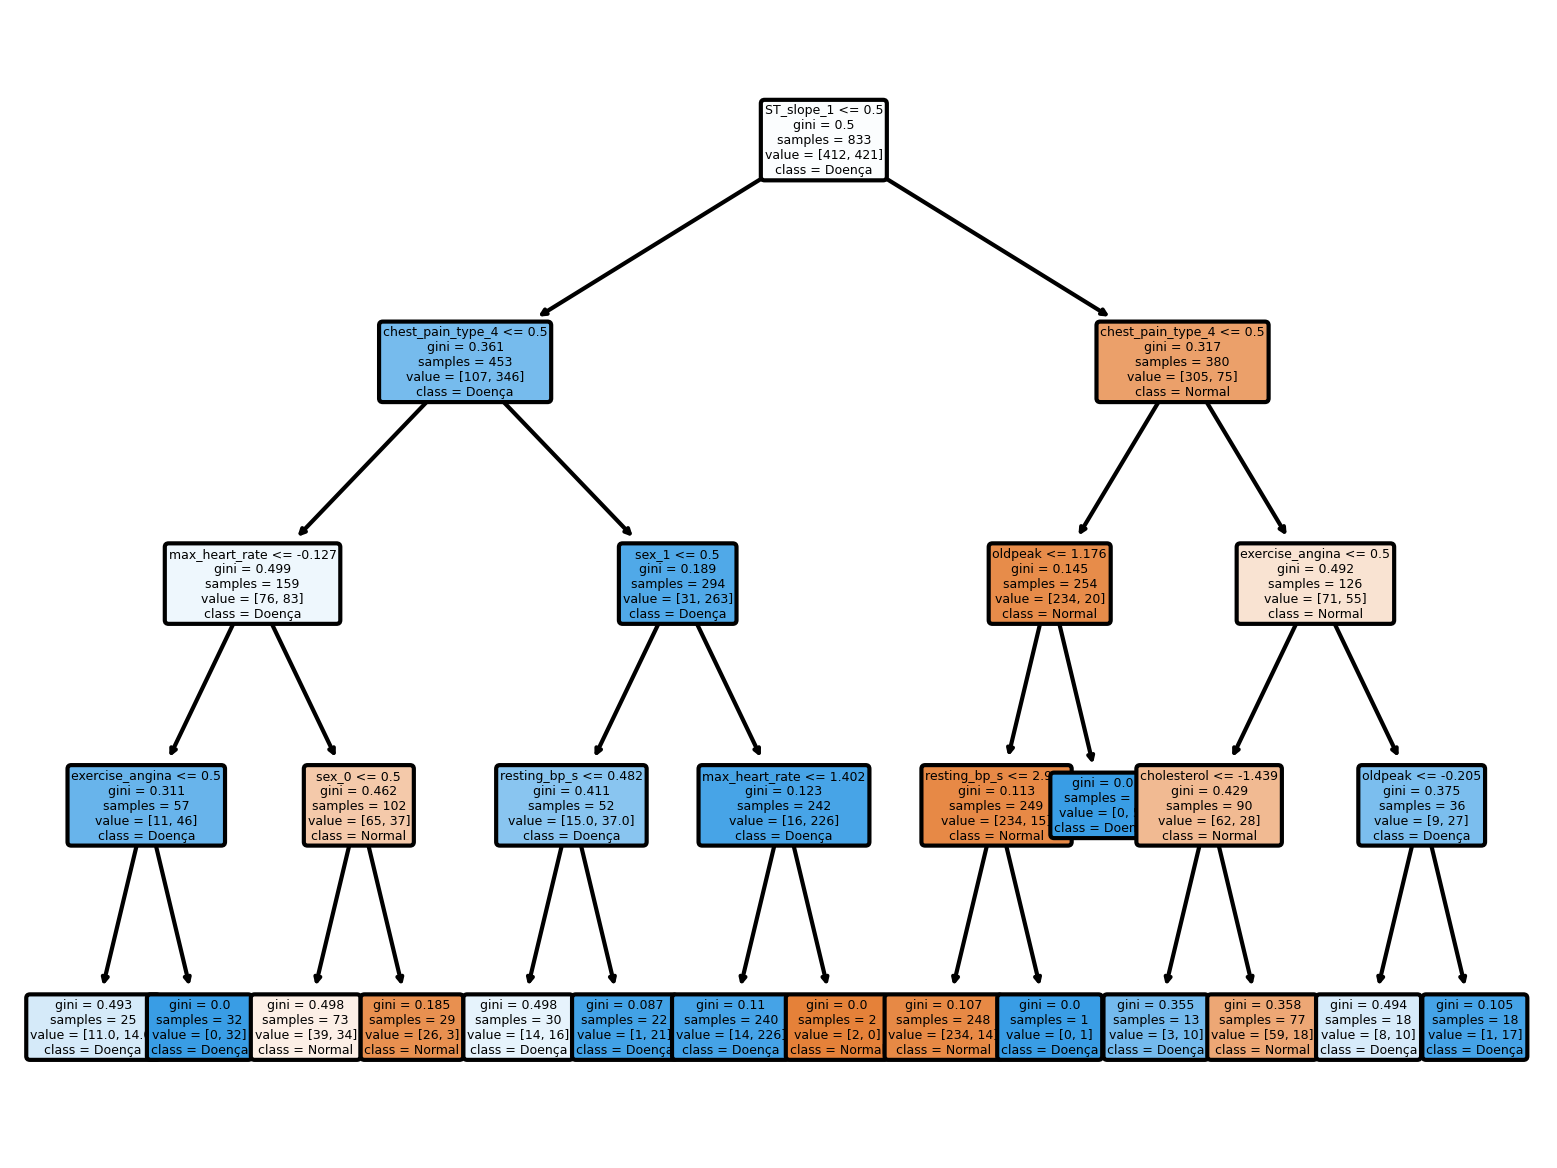

In [9]:
feature_names = [str(name) for name in X.columns]
class_names = {0: 'Normal', 1: 'Doença'}

plt.figure(dpi=300)
plot_tree(dtc,
          class_names=list(class_names.values()),
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=3)

plt.show()

In [10]:
acuracia = accuracy_score(y_teste, previsoes)
print("Acurácia do modelo DecisionTreeClassifier - %.2f%%" % (acuracia * 100))

Acurácia do modelo DecisionTreeClassifier - 82.07%


In [11]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       149
           1       0.85      0.84      0.85       208

    accuracy                           0.82       357
   macro avg       0.82      0.82      0.82       357
weighted avg       0.82      0.82      0.82       357

